[pyDSA](https://github.com/gabylaunay/pyDSA) is a python3 package for Drop Shape Analysis.

## Installing pyDSA

### Dependencies
You will first need to install [IMTreatment](https://github.com/gabylaunay/IMTreatment) by downloading the package [here](https://github.com/gabylaunay/IMTreatment/archive/master.zip), extracting it and installing it with:
```bash
python3 setup.py install
```

pyDSA also use [OpenCV](https://opencv.org) as a dependency, so you will need it installed as well.

### Install pyDSA
Download the sources [here](https://github.com/gabylaunay/pyDSA/archive/master.zip), extract, and install them:

```bash
python3 setup.py install
```

pyDSA have some dependencies (matplotlib, scipy, numpy, ...) that should be installed automatically.



## Importing an image

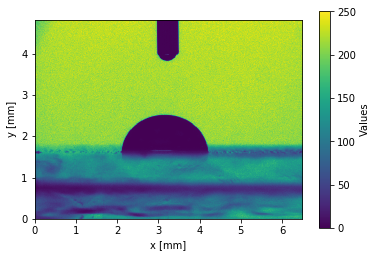

In [1]:
import pyDSA as dsa
import matplotlib.pyplot as plt

# Import an image
im = dsa.import_from_image('data/image.bmp', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')

# Display
plt.figure()
im.display()
plt.show()

## Focusing on the drop

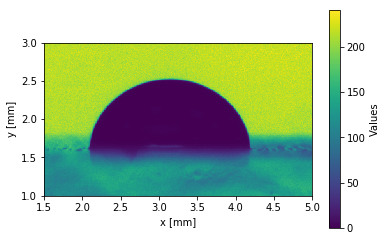

In [2]:
im.crop(intervx=[1.5, 5], intervy=[1, 3], inplace=True)

# Display
plt.figure()
im.display()
plt.show()

## Setting the baseline

The interactive function `im.choose_baseline()` can be used to interactively set the baseline.
It will display the drop and ask you to put several baseline points by clicking on the image.

Here we are gonna use the non-interactive function `im.set_baseline()`.

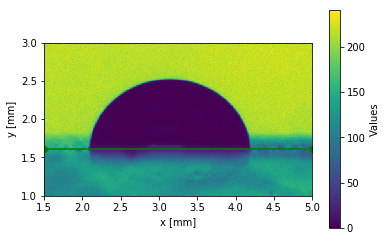

In [3]:
im.set_baseline([2, 1.61], [4.5, 1.61])

# Display
plt.figure()
im.display()
plt.show()

The baseline is automatically displayed as a green line on the drop image.

## Detecting the edges

The drop edge is detected using the [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector) algorithm from OpenCV.

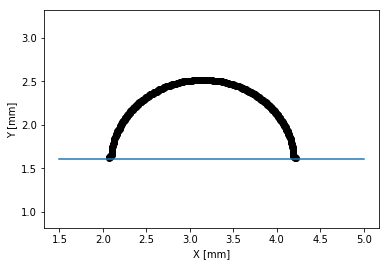

In [4]:
edge = im.edge_detection()

# Display the edge
plt.figure()
edge.display()
plt.show()

If the edge detection is not good enough, the `edge_detection` function has several optional arguments that can help you get the edges you want.
Please refer to the documentation of this function if you want to know more about this.

## Fitting the edge

Computing the contact angles will necessitates the edges to be fitted by a curve of some kind. 
pyDSA uses a spline to get a continuous definition of the drop edge.

The parameter `s` can be tuned to adapt the fitting.
Small values of `s` mean more accurate fitting.

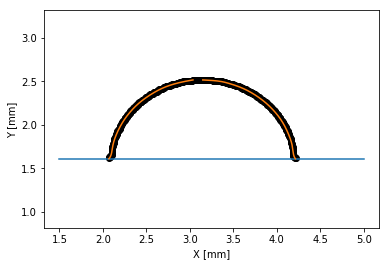

In [5]:
edge.fit(s=0.0005)

# Display the edge
plt.figure()
edge.display()
plt.show()

The edge fit is displayed in orange on top of the detected edge.

## Detecting the triple points

In the case of a SLIPS surface, pyDSA can detect the triple point (triple point of contact between the oil, water and air).
This is done by detecting the edge fit point of inflexion.

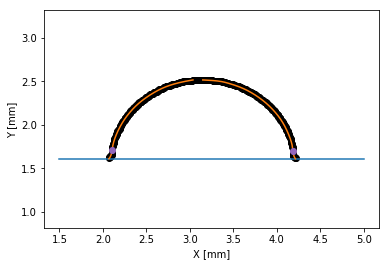

In [6]:
edge.detect_triple_points()

# Display the edge
plt.figure()
edge.display()
plt.show()

The triple points are displayed in purple on the detected edge.

## Computing the contact angles

pyDSA uses the edge fitting to compute the contact angle at the contact between the drop and the baseline.

If triple points have been detected successfully, the apparent contact angle at the triple points are also computed.

Contact angles: [48.90734602702736, 126.40314516490614]
Triple point angles: [81.4670191340014, 96.86878969719106]


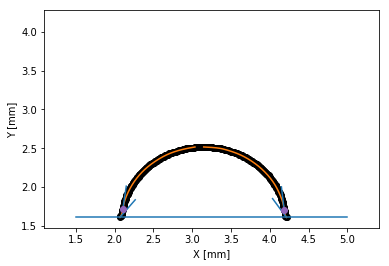

In [7]:
edge.compute_contact_angle()
print('Contact angles: {}'.format(edge.thetas))
print('Triple point angles: {}'.format(edge.thetas_triple))

# Display the edge
plt.figure()
edge.display()
plt.show()

# Full script

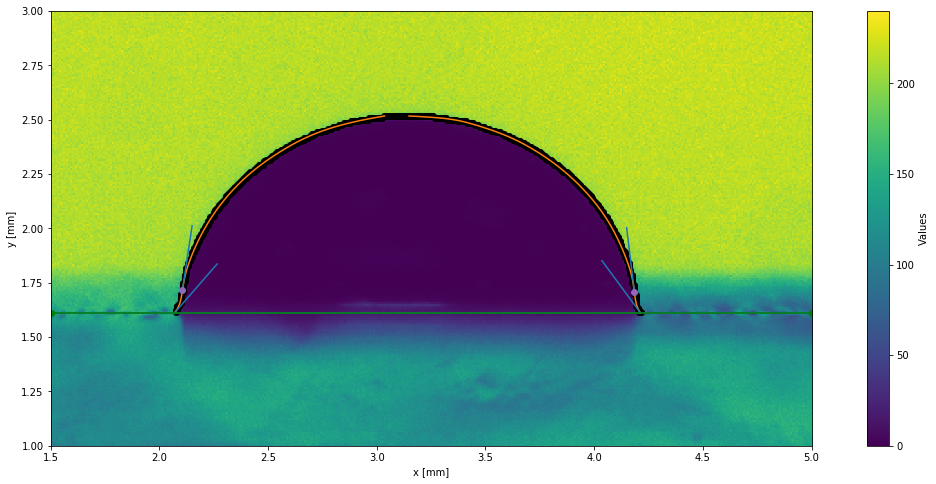

In [8]:
import pyDSA as dsa
import matplotlib.pyplot as plt

im = dsa.import_from_image('data/image.bmp', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')
im.crop(intervx=[1.5, 5], intervy=[1, 3], inplace=True)
im.set_baseline([2, 1.61], [4.5, 1.61])
edge = im.edge_detection()
edge.fit(s=0.0005)
edge.detect_triple_points()
edge.compute_contact_angle()

# Display the edge
plt.figure(figsize=(20, 8))
edge.display()
im.display()
plt.show()

